In [1]:
import logging

import numpy as np
import matplotlib.pyplot as plt

from sldvol.core import SLDToolSetup
from sldvol.helpers import setup_logging

log = setup_logging(__name__)
%matplotlib inline

In [2]:
# Experimental sample:

sample_d2o_conc = [0, 38, 100]
sample_slds = [0.017, 1.8985, 4.961]
sample_sld_errors = [0.08, 0.13, 0.012]


In [3]:
tool = SLDToolSetup(
    sample_x=sample_d2o_conc, 
    sample_y=sample_slds, 
    sample_err=sample_sld_errors
)

In [4]:
tool.sample_x

[0, 38, 100]

In [5]:
tool.sample_y

[0.017, 1.8985, 4.961]

In [6]:
tool.sample_err

[0.08, 0.13, 0.012]

In [7]:
tool.find_volumes()

05-11 22:14 INFO : Calculating volumes ...
05-11 22:14 INFO : Finished calculating volumes: vs, vp and vl (solvent, protein and lipids, respectively).
05-11 22:14 INFO : Result: 

	SOLVENT = 65.0 +/- 0.7%, 
	PROTEIN = 25.0 +/- 1.2%, 
	  LIPID = 10.0 +/- 0.6%


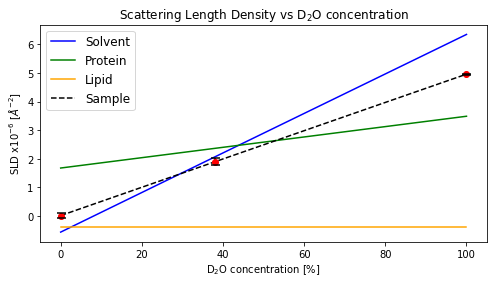

In [8]:
tool.show_plot()

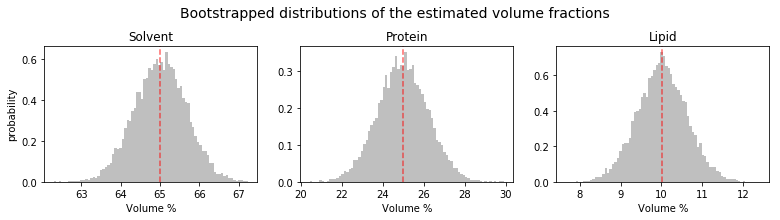

In [9]:
tool.show_bootstrapped_volumes()